**Inaugural Project**

In [1]:
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

Uninsured agents have an expected value of
$$ V_0 = pu(y-x) + (1-p)(y) $$

If they choose to get insurance, the insurance company has a premium policy
$$ \pi(p, q) = pq, $$
where 
$$ q \in [0,x].$$

This means that an insured agent has the expected utility

$$ V(q; \pi) = pu (y-x + q - \pi(p,q)) + (1-p)u(y - \pi(p,q)), $$

where
$$ u(z) = \frac{z^{1+\vartheta}}{1+\vartheta} $$

**Finding the optimal q (Exercise 1)**

First, we need a function for utility.

In [2]:
def utility(z, theta):
    u = (z**(1+theta))/(1+theta)
    return u

Then we need a function for expected utility (V) when covered by insurance.

In [3]:
def exp_utility(q, x, y, p):
    V = p*utility(y-x+(1-p)*q, theta) + (1-p)*utility(y-p*q, theta)
    return V

In [4]:
x = 0.6
y = 1
p = 0.2
theta = -2

def q_optimize(x, y, p):
    obj = lambda q: -exp_utility(q, x, y, p)
    res = optimize.minimize_scalar(obj, bounds=(0, 1), method='bounded')
    return res.x
    
# grid for xs
xs = np.linspace(0.01, 0.9, 100)

# grid for qstar
qstar = np.zeros(100)

# loop
for i, x in enumerate(xs):
    qstar[i] = q_optimize(x, y, p)

In [5]:
print(qstar)

[0.00999984 0.01898912 0.02797939 0.03696994 0.04596086 0.05494822
 0.06393981 0.07292958 0.08191938 0.09090921 0.09989906 0.1088875
 0.11788034 0.12686991 0.13585952 0.14484918 0.15383889 0.16282863
 0.17181841 0.18080908 0.18979691 0.19878797 0.20777889 0.21676915
 0.22575605 0.23474721 0.24373599 0.25272713 0.26171677 0.27070619
 0.27969543 0.28868786 0.29767683 0.30666573 0.31565498 0.32464751
 0.33363683 0.34262633 0.35161621 0.36060609 0.36959632 0.37858515
 0.38757636 0.39656588 0.40555421 0.4145455  0.42353524 0.43252508
 0.4415149  0.45050473 0.45949455 0.46848438 0.47747423 0.48646411
 0.49545513 0.50444509 0.51343503 0.52242494 0.53141483 0.54040468
 0.54939452 0.55838434 0.56737359 0.57636352 0.58535345 0.59434339
 0.60333331 0.61232172 0.62131271 0.63030248 0.63929409 0.64828289
 0.65727268 0.66626256 0.67525274 0.68424372 0.69323182 0.70222311
 0.7112111  0.72020198 0.72919188 0.73818179 0.74717295 0.75616299
 0.76515091 0.7741413  0.78313095 0.79212034 0.80111271 0.81010

Text(0.5, 1.0, 'Optimal insurance coverage, $q^*$')

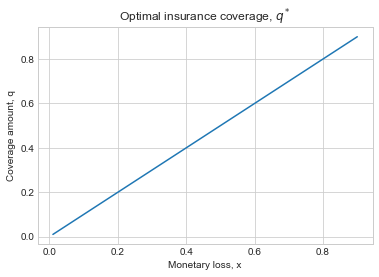

In [6]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(xs, qstar,'-')
ax.set_xlabel('Monetary loss, x')
ax.set_ylabel('Coverage amount, q')
ax.set_title('Optimal insurance coverage, $q^*$')

**Optimal $\pi$ (Exercise 2)**

In [7]:
x = 0.6
y = 1
p = 0.2
theta = -2
def V_pi(pi, q, x, y, p):
    return p*utility(y-x+q-pi, theta) + (1-p)*utility(y-pi, theta)

In [8]:
V0 = V_pi(0, 0, x, y, p)

In [9]:
def optimal_pi(q, x, y, p, V0):
    # objective function
    def obj(pi):
        return V_pi(pi, q, x, y, p) - V0
    # optimize
    res = optimize.root(obj, 0.1)
    return res.x

# grid for qs between 0.01 and 0.6
qs = np.linspace(0.01, 0.6, 100)

# grid for pi calculations
pis = np.zeros(100)

# loop
for i, q in enumerate(qs):
    pis[i] = optimal_pi(q, x, y, p, V0)

Text(0.5, 1.0, 'Optimal $\\pi$')

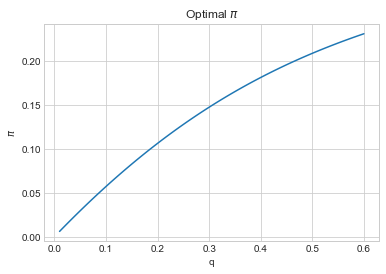

In [10]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(qs, pis,'-')
ax.set_xlabel('q')
ax.set_ylabel('$\pi$')
ax.set_title('Optimal $\pi$')

**Exercise 3**

In [11]:
alpha = 2
beta = 7
N = 10000

In [12]:
def g(x, y, gamma, pi):
    return utility(y-(1-gamma)*x-pi, theta)

In [13]:
def monte_carlo(y, p, gamma, pi, N):
    np.random.seed(123)
    # Draws of X
    xlist = np.random.beta(alpha, beta, N)
    return np.mean(g(xlist, y, gamma, pi))

Finding the most preferable option

In [16]:
# gamma = 0.9, pi = 0.2
print(monte_carlo(y, p, 0.9, 0.2, N))

-1.2858562100115782


In [17]:
# gamma = 0.45, pi = 0.1
print(monte_carlo(y, p, 0.45, 0.1, N))

-1.2965582462632568
